In [56]:
import matplotlib.pyplot as plt
import cartesian_explorer as caex
import qtensor
import numpy as np
from qtensor.tools.benchmarking import simulators as benchsim

In [3]:
par = caex.parallels.Ray(processes=55)
cache = caex.caches.JobLibCache('../caex_cache/')
ex = caex.Explorer(parallel=par, cache=cache)

2021-06-09 05:48:09,770	INFO services.py:1090 -- View the Ray dashboard at http://127.0.0.1:8265


## Set up functions

In [5]:
@ex.provider
def graph(N, seed=10):
    return qtensor.toolbox.random_graph(nodes=N, seed=seed, degree=3, type='random')

In [41]:
@ex.provider
def sim(sim_id='qtensor_merged_acc'):
    return {
        'qtensor_merged_acc': benchsim.MergedQtensorSimulator(accelerated=True)
    }[sim_id]

@ex.provider
def energy_ests(graph, p, sim: benchsim.BenchSimulator, ordering_algo='rgreedy_0.02_10'):
    opts, ests, opt_time = sim.optimize_qaoa_energy(G=graph, p=p, ordering_algo=ordering_algo)
    return ests

In [51]:
@ex.provider
def energy_max_tw(energy_ests):
    tws = [e.width for e in energy_ests]
    return np.max(tws)

## Test plot

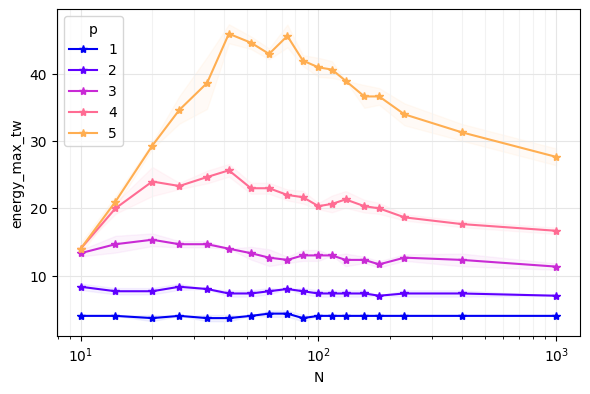

In [61]:
fig = ex.plot_variables(('energy_max_tw',),
                        distribution_var=('seed',),
                        plot_kwargs=dict(marker='*'),
                        p=[1,2,3,4,5],
                        N = [10, 14, 20, 26, 34, 42, 52, 62, 74, 86, 100, 114, 130, 156, 180, 230, 400, 1000],
                        seed = [10, 11, 12],
                        ordering_algo=['rgreedy_0.01_10']
                       )
plt.xscale('log')

## Collect the data

In [87]:
Ns = [10, 14, 20, 26, 34, 42, 52, 62, 74, 86, 100, 114, 130, 156, 180, 230, 400, 1000]
seeds = range(20, 20+16)

data = ex.map_variables(('energy_max_tw',),
                        p=[1,2,3,4,5],
                        N = Ns,
                        seed = seeds,
                        ordering_algo=['rgreedy_0.01_10']
                       )

2021-06-09 07:28:02,927	WARNING worker.py:1091 -- WARNING: 166 PYTHON workers have been started. This could be a result of using a large number of actors, or it could be a consequence of using nested tasks (see https://github.com/ray-project/ray/issues/3644) for some a discussion of workarounds.
2021-06-09 07:28:02,969	WARNING worker.py:1091 -- WARNING: 166 PYTHON workers have been started. This could be a result of using a large number of actors, or it could be a consequence of using nested tasks (see https://github.com/ray-project/ray/issues/3644) for some a discussion of workarounds.
2021-06-09 07:28:03,012	WARNING worker.py:1091 -- WARNING: 167 PYTHON workers have been started. This could be a result of using a large number of actors, or it could be a consequence of using nested tasks (see https://github.com/ray-project/ray/issues/3644) for some a discussion of workarounds.
2021-06-09 07:28:03,037	WARNING worker.py:1091 -- WARNING: 169 PYTHON workers have been started. This could b

In [88]:
data.shape

(1, 5, 18, 16)

## Save the data

In [89]:
import xarray as xa

In [90]:
d = xa.DataArray(data=data[0], dims=('p', 'N', 'seed'), coords=(range(1,6), Ns, seeds))


In [92]:
d.dims

('p', 'N', 'seed')

In [96]:
d.sel(p=1)

<xarray.DataArray (N: 18, seed: 16)>
array([[4, 5, 4, 4, 5, 4, 3, 5, 4, 4, 5, 3, 5, 4, 5, 4],
       [4, 5, 3, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 3, 4, 3],
       [4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 3, 5],
       [4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3],
       [3, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4],
       [4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 5, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4],
       [3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4],
       [4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4],
       [4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 3, 4, 3, 5, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4]])
Coordinates:
    p        int64 1
  * N        (N) int64 10 14 20 26 34 42 52 62 ... 114 130 156 180 230 400 1000
  * seed     (seed) int64 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35

In [98]:
d.to_netcdf('../energy_max_tw.nc')

---
## P.S.
### Tests

In [47]:
opts, ests, tim = s.optimize_qaoa_energy(graph(20), p=3)

eorbits time 0.014201164245605469


In [50]:
[tuple(x.__dict__.items()) for x in ests]

[(('width', 14), ('flops', 32768), ('mems', 262144)),
 (('width', 15), ('flops', 65536), ('mems', 524288)),
 (('width', 15), ('flops', 65536), ('mems', 524288)),
 (('width', 16), ('flops', 131072), ('mems', 1048576)),
 (('width', 15), ('flops', 65536), ('mems', 524288)),
 (('width', 14), ('flops', 32768), ('mems', 262144)),
 (('width', 12), ('flops', 8192), ('mems', 65536)),
 (('width', 14), ('flops', 32768), ('mems', 262144)),
 (('width', 14), ('flops', 32768), ('mems', 262144)),
 (('width', 13), ('flops', 16384), ('mems', 131072)),
 (('width', 15), ('flops', 65536), ('mems', 524288)),
 (('width', 14), ('flops', 32768), ('mems', 262144)),
 (('width', 15), ('flops', 65536), ('mems', 524288)),
 (('width', 14), ('flops', 32768), ('mems', 262144)),
 (('width', 13), ('flops', 16384), ('mems', 131072)),
 (('width', 13), ('flops', 16384), ('mems', 131072)),
 (('width', 14), ('flops', 32768), ('mems', 262144)),
 (('width', 13), ('flops', 16384), ('mems', 131072)),
 (('width', 14), ('flops', 3